# 모듈 + 불러오기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from geoband.API import *
GetCompasData('SBJ_2208_001', '1', '1_연수구_전입현황.xlsx')
GetCompasData('SBJ_2208_001', '2', '2_연수구_전출현황.xlsx')

[2022-09-22 11:42:51] 성공 - 1_연수구_전입현황.xlsx
[2022-09-22 11:42:51] 성공 - 2_연수구_전출현황.xlsx


'2_연수구_전출현황.xlsx'

# 전입

In [ ]:
# 전입현황 : Move_in
Move_in = pd.read_excel('1_연수구_전입현황.xlsx', sheet_name = None )

In [ ]:
#여러 시트를 하나의 df로 합치기
Move_in_df = pd.concat([Move_in['2012'], Move_in['2013'], Move_in['2014'], Move_in['2015'],Move_in['2016'], 
                        Move_in['2017'], Move_in['2018'], Move_in['2019'], Move_in['2020'], Move_in['2021'], Move_in['2022']])

Move_in_df.reset_index(inplace = True)
Move_in_df.drop('index', axis = 1 , inplace = True)

In [ ]:
# 날짜데이터 문자열로 형변환
Move_in_df.base_date = Move_in_df['base_date'].astype('str')

In [ ]:
# 연도만 추출
date_list = list(Move_in_df['base_date'])
year = ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']

for i in range(len(date_list)):
    for j in range(len(year)):
        if date_list[i][:-2] == year[j]:
            date_list[i] = year[j]
            
Move_in_df['base_date'] = date_list

In [ ]:
# '관내'로 되어있는 시도 명칭을 '인천광역시' 로 수정

Move_in_df['sd_nm'] = Move_in_df["sd_nm"].apply(lambda x: '인천광역시' if x =='관내' else x) 

In [ ]:
# '관내'로 되어있는 시군구 명칭을 '연수구' 로 수정

Move_in_df['sgg_nm'] = Move_in_df["sgg_nm"].apply(lambda x: '연수구' if x =='관내' else x)

In [ ]:
# 읍면동 명칭 수정
Move_in_df['emd_nm'] = Move_in_df['emd_nm'].apply(lambda x :'옥련동' if x in ['옥련1동', '옥련2동'] else x )
Move_in_df['emd_nm'] = Move_in_df['emd_nm'].apply(lambda x :'연수동' if x in ['연수1동', '연수2동', '연수3동'] else x )
Move_in_df['emd_nm'] = Move_in_df['emd_nm'].apply(lambda x :'동춘동' if x in ['동춘1동', '동춘2동', '동춘3동'] else x )
Move_in_df['emd_nm'] = Move_in_df['emd_nm'].apply(lambda x :'송도동' if x in ['송도1동', '송도2동', 
                                                                           '송도3동', '송도4동', '송도5동'] else x )

In [ ]:
## 해당연도에 각 동별로 얼마나 전입했는가를 보기 위해 ''base_date', emd_nm'으로 sum()

# cnt : 전입 건 수
# hshld_num  : 전입 세대 수
# prsn_num  : 전입 인원 수

Move_in_df2 = Move_in_df.copy()
Move_in_df2 = Move_in_df2.groupby(['base_date', 'emd_nm']).sum()
Move_in_df2.reset_index(inplace = True)

In [ ]:
Move_in_df2.head()

,base_date,emd_nm,cnt,hshld_num,prsn_num
0,2012,동춘동,4622,3129,10019
1,2012,선학동,2288,1652,3766
2,2012,송도동,8236,6320,19649
3,2012,연수동,9327,7031,15411
4,2012,옥련동,4566,3110,8663


In [ ]:
# 18년에서 21년 동별로 얼마나 전입했나?

Move_in_1822 = Move_in_df2[Move_in_df2['base_date'] >= '2018']
Move_in_1821 = Move_in_1822[Move_in_1822['base_date'] < '2022']
Move_in_1821.head()

,base_date,emd_nm,cnt,hshld_num,prsn_num
36,2018,동춘동,4898,3205,10375
37,2018,선학동,1943,1347,2862
38,2018,송도동,18760,14490,39676
39,2018,연수동,7180,5213,10620
40,2018,옥련동,3438,2247,5791


In [ ]:
Move_in_1821.reset_index(inplace = True)
Move_in_1821 = Move_in_1821.drop(columns = 'index')

In [ ]:
Move_in_1821.head()

,base_date,emd_nm,cnt,hshld_num,prsn_num
0,2018,동춘동,4898,3205,10375
1,2018,선학동,1943,1347,2862
2,2018,송도동,18760,14490,39676
3,2018,연수동,7180,5213,10620
4,2018,옥련동,3438,2247,5791


In [ ]:
# 저장
Move_in_1821.to_csv('전입현황_동별_1821.csv', encoding = 'utf-8', index = False)

In [ ]:
# 불러오기
Move_in_fin = pd.read_csv('전입현황_동별_1821.csv', encoding = 'utf-8')
Move_in_fin.head()

,base_date,emd_nm,cnt,hshld_num,prsn_num
0,2018,동춘동,4898,3205,10375
1,2018,선학동,1943,1347,2862
2,2018,송도동,18760,14490,39676
3,2018,연수동,7180,5213,10620
4,2018,옥련동,3438,2247,5791


# 전출

In [ ]:
# 전출현황 : Move_out
Move_out = pd.read_excel('2_연수구_전출현황.xlsx', sheet_name = None )

In [ ]:
#여러 시트를 하나의 df로 합치기
Move_out_df = pd.concat([Move_out['2012'], Move_out['2013'], Move_out['2014'], Move_out['2015'], Move_out['2016'], 
                        Move_out['2017'], Move_out['2018'], Move_out['2019'], Move_out['2020'], Move_out['2021'], Move_out['2022']])

Move_out_df.reset_index(inplace = True)
Move_out_df.drop('index', axis = 1 , inplace = True)

In [ ]:
# 날짜데이터 문자열로 형변환
Move_out_df.base_date = Move_out_df['base_date'].astype('str')

In [ ]:
# 연도만 추출
date_list = list(Move_out_df['base_date'])
year = ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']

for i in range(len(date_list)):
    for j in range(len(year)):
        if date_list[i][:-2] == year[j]:
            date_list[i] = year[j]
            
Move_out_df['base_date'] = date_list

In [ ]:
# '관내'로 되어있는 시도 명칭을 '인천광역시' 로 수정

Move_out_df['sd_nm'] = Move_out_df["sd_nm"].apply(lambda x: '인천광역시' if x =='관내' else x) 

In [ ]:
# '관내'로 되어있는 시군구 명칭을 '연수구' 로 수정

Move_out_df['sgg_nm'] = Move_out_df["sgg_nm"].apply(lambda x: '연수구' if x =='관내' else x)

In [ ]:
# 읍면동 명칭 수정
Move_out_df['emd_nm'] = Move_out_df['emd_nm'].apply(lambda x :'옥련동' if x in ['옥련1동', '옥련2동'] else x )
Move_out_df['emd_nm'] = Move_out_df['emd_nm'].apply(lambda x :'연수동' if x in ['연수1동', '연수2동', '연수3동'] else x )
Move_out_df['emd_nm'] = Move_out_df['emd_nm'].apply(lambda x :'동춘동' if x in ['동춘1동', '동춘2동', '동춘3동'] else x )
Move_out_df['emd_nm'] = Move_out_df['emd_nm'].apply(lambda x :'송도동' if x in ['송도1동', '송도2동', 
                                                                           '송도3동', '송도4동', '송도5동'] else x )

In [ ]:
## 해당연도에 각 동별로 얼마나 전출했는가를 보기 위해 'emd_nm', 'base_date' 기준으로 sum()

# cnt : 전출 건 수
# hshld_num  : 전출 세대 수
# prsn_num  : 전출 인원 수

Move_out_df2 = Move_out_df.copy()
Move_out_df2 = Move_out_df2.groupby(['base_date', 'emd_nm']).sum()
Move_out_df2.reset_index(inplace = True)

In [ ]:
Move_out_df2.head()

,base_date,emd_nm,cnt,hshld_num,prsn_num
0,2012,동춘동,5134,3807,10965
1,2012,선학동,2588,1891,4191
2,2012,송도동,5676,4142,12695
3,2012,연수동,9521,7030,16630
4,2012,옥련동,4780,3467,9288


In [ ]:
# 18년에서 21년 동별로 얼마나 전출했나?

Move_out_1822 = Move_out_df2[Move_out_df2['base_date'] >= '2018']
Move_out_1821 = Move_out_1822[Move_out_1822['base_date'] < '2022']
Move_out_1821.head()

,base_date,emd_nm,cnt,hshld_num,prsn_num
36,2018,동춘동,4523,3287,8845
37,2018,선학동,2225,1608,3427
38,2018,송도동,12713,9472,25306
39,2018,연수동,8285,5986,13277
40,2018,옥련동,4251,3055,7270


In [ ]:
Move_out_1821.reset_index(inplace = True)
Move_out_1821 = Move_out_1821.drop(columns = 'index')

In [ ]:
Move_out_1821.head()

,base_date,emd_nm,cnt,hshld_num,prsn_num
0,2018,동춘동,4523,3287,8845
1,2018,선학동,2225,1608,3427
2,2018,송도동,12713,9472,25306
3,2018,연수동,8285,5986,13277
4,2018,옥련동,4251,3055,7270


In [ ]:
# 저장
Move_out_1821.to_csv('전출현황_동별_1821.csv', encoding = 'utf-8', index = False)

In [ ]:
# 불러오기

Move_out_fin = pd.read_csv('전출현황_동별_1821.csv', encoding = 'utf-8')
Move_out_fin.head()

,base_date,emd_nm,cnt,hshld_num,prsn_num
0,2018,동춘동,4523,3287,8845
1,2018,선학동,2225,1608,3427
2,2018,송도동,12713,9472,25306
3,2018,연수동,8285,5986,13277
4,2018,옥련동,4251,3055,7270


# 최종 : 전입 + 전출 (19~21)

In [ ]:
# 데이터 불러오기
Move_in_fin = pd.read_csv('전입현황_동별_1821.csv', encoding = 'utf-8')
Move_out_fin = pd.read_csv('전출현황_동별_1821.csv', encoding = 'utf-8')

In [ ]:
# 하나의 데이터프레임으로 합치면 알아보기 힘드니까 칼럼명 조작
Move_in_fin = Move_in_fin.rename(columns = {'cnt' : 'in_cnt', 'hshld_num' : 'in_hshld_num', 'prsn_num' : 'in_prsn_num'})
Move_out_fin = Move_out_fin.rename(columns = {'cnt' : 'out_cnt', 'hshld_num' : 'out_hshld_num', 'prsn_num' : 'out_prsn_num'})

In [ ]:
Move_in_fin.head()

,base_date,emd_nm,in_cnt,in_hshld_num,in_prsn_num
0,2018,동춘동,4898,3205,10375
1,2018,선학동,1943,1347,2862
2,2018,송도동,18760,14490,39676
3,2018,연수동,7180,5213,10620
4,2018,옥련동,3438,2247,5791


In [ ]:
Move_out_fin.head()

,base_date,emd_nm,out_cnt,out_hshld_num,out_prsn_num
0,2018,동춘동,4523,3287,8845
1,2018,선학동,2225,1608,3427
2,2018,송도동,12713,9472,25306
3,2018,연수동,8285,5986,13277
4,2018,옥련동,4251,3055,7270


In [ ]:
# (base_date, emd_nm) 기준으로 합치기
Move_df = pd.merge(Move_in_fin, Move_out_fin, on = ['base_date', 'emd_nm'], how='outer')
Move_df.head()

,base_date,emd_nm,in_cnt,in_hshld_num,in_prsn_num,out_cnt,out_hshld_num,out_prsn_num
0,2018,동춘동,4898,3205,10375,4523,3287,8845
1,2018,선학동,1943,1347,2862,2225,1608,3427
2,2018,송도동,18760,14490,39676,12713,9472,25306
3,2018,연수동,7180,5213,10620,8285,5986,13277
4,2018,옥련동,3438,2247,5791,4251,3055,7270


In [ ]:
# 결측값 확인
Move_df.isnull().sum()

base_date        0
emd_nm           0
in_cnt           0
in_hshld_num     0
in_prsn_num      0
out_cnt          0
out_hshld_num    0
out_prsn_num     0
dtype: int64

In [ ]:
# 전입 + 전출 데이터 저장 : 연수구_전입_전출

Move_df.to_csv('최종_전입전출_1821.csv', index = False, encoding = 'utf-8')

In [ ]:
Move_df = pd.read_csv('최종_전입전출_1821.csv', encoding = 'utf-8')
Move_df.head()

,base_date,emd_nm,in_cnt,in_hshld_num,in_prsn_num,out_cnt,out_hshld_num,out_prsn_num
0,2018,동춘동,4898,3205,10375,4523,3287,8845
1,2018,선학동,1943,1347,2862,2225,1608,3427
2,2018,송도동,18760,14490,39676,12713,9472,25306
3,2018,연수동,7180,5213,10620,8285,5986,13277
4,2018,옥련동,3438,2247,5791,4251,3055,7270


# 최종 : 전입전출_신도심_원도심
- 컬럼이름 : center

In [ ]:
Move_old = Move_df[Move_df['emd_nm'] != '송도동']
Move_old = Move_old.groupby('base_date').sum()
Move_old.reset_index(inplace = True)
Move_old.insert(1, 'center', '신도심')
Move_old

,base_date,center,in_cnt,in_hshld_num,in_prsn_num,out_cnt,out_hshld_num,out_prsn_num
0,2018,신도심,20736,14449,34541,23060,16751,38980
1,2019,신도심,23488,16690,40258,23762,17154,39547
2,2020,신도심,22633,15628,36620,25726,18620,42435
3,2021,신도심,20621,14060,31196,23031,16652,35000


In [ ]:
Move_new = Move_df[Move_df['emd_nm'] == '송도동']
Move_new = Move_new.rename(columns = {'emd_nm' : 'center'})
Move_new['center'] = '원도심'
Move_new

,base_date,center,in_cnt,in_hshld_num,in_prsn_num,out_cnt,out_hshld_num,out_prsn_num
2,2018,원도심,18760,14490,39676,12713,9472,25306
8,2019,원도심,24995,19224,48678,16028,11668,30493
14,2020,원도심,34105,27001,71069,23172,16705,45535
20,2021,원도심,23667,17185,41412,21252,14825,36162


In [ ]:
# 합치기

Move_old_new = pd.concat([Move_old, Move_new])
Move_old_new = Move_old_new.sort_values(by = Move_old_new.columns[0])
Move_old_new.reset_index(inplace = True)
Move_old_new = Move_old_new.drop(columns = 'index')
Move_old_new

,base_date,center,in_cnt,in_hshld_num,in_prsn_num,out_cnt,out_hshld_num,out_prsn_num
0,2018,신도심,20736,14449,34541,23060,16751,38980
1,2018,원도심,18760,14490,39676,12713,9472,25306
2,2019,신도심,23488,16690,40258,23762,17154,39547
3,2019,원도심,24995,19224,48678,16028,11668,30493
4,2020,신도심,22633,15628,36620,25726,18620,42435
5,2020,원도심,34105,27001,71069,23172,16705,45535
6,2021,신도심,20621,14060,31196,23031,16652,35000
7,2021,원도심,23667,17185,41412,21252,14825,36162


In [ ]:
# 저장

Move_old_new.to_csv('최종_전입전출_신도심_원도심.csv', encoding = 'utf-8', index = False)

In [ ]:
# 불러오기
Move_old_new_fin = pd.read_csv('최종_전입전출_신도심_원도심.csv', encoding = 'utf-8')

In [ ]:
Move_df.head()

,base_date,emd_nm,in_cnt,in_hshld_num,in_prsn_num,out_cnt,out_hshld_num,out_prsn_num
0,2018,동춘동,4898,3205,10375,4523,3287,8845
1,2018,선학동,1943,1347,2862,2225,1608,3427
2,2018,송도동,18760,14490,39676,12713,9472,25306
3,2018,연수동,7180,5213,10620,8285,5986,13277
4,2018,옥련동,3438,2247,5791,4251,3055,7270


In [ ]:
# 동별 df

Move_dongchun = Move_df[Move_df['emd_nm'] == '동춘동']                 
Move_seonhak = Move_df[Move_df['emd_nm'] == '선학동']
Move_songdo = Move_df[Move_df['emd_nm'] == '송도동']
Move_yeonsu = Move_df[Move_df['emd_nm'] == '연수동']
Move_ongnyeon = Move_df[Move_df['emd_nm'] == '옥련동']
Move_chunghak = Move_df[Move_df['emd_nm'] == '청학동']

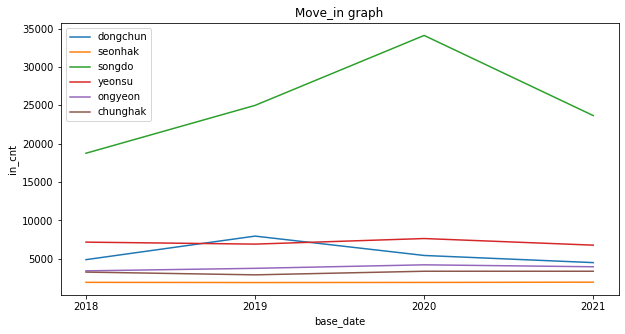

In [ ]:
# 연도별 각 동의 전입건수 graph

plt.figure(figsize = (10,5))
plt.plot(Move_dongchun['base_date'], Move_dongchun['in_cnt'])
plt.plot(Move_seonhak['base_date'], Move_seonhak['in_cnt'])
plt.plot(Move_songdo['base_date'], Move_songdo['in_cnt'])
plt.plot(Move_yeonsu['base_date'], Move_yeonsu['in_cnt'])
plt.plot(Move_ongnyeon['base_date'], Move_ongnyeon['in_cnt'])
plt.plot(Move_chunghak['base_date'], Move_chunghak['in_cnt'])
plt.xlabel('base_date')
plt.ylabel('in_cnt')
plt.xticks(Move_songdo['base_date'])
plt.title("Move_in graph")
plt.legend(['dongchun', 'seonhak', 'songdo', 'yeonsu', 'ongyeon', 'chunghak'])

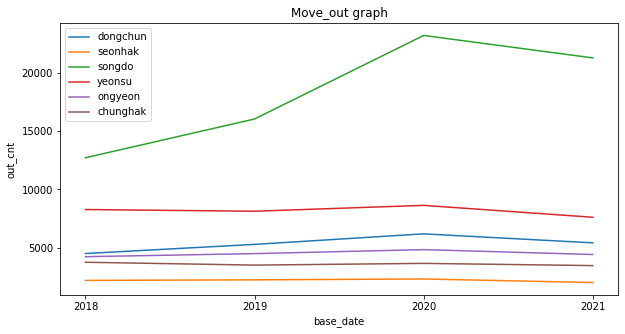

In [ ]:
# 연도별 각 동의 전출건수 graph

plt.figure(figsize = (10,5))
plt.plot(Move_dongchun['base_date'], Move_dongchun['out_cnt'])
plt.plot(Move_seonhak['base_date'], Move_seonhak['out_cnt'])
plt.plot(Move_songdo['base_date'], Move_songdo['out_cnt'])
plt.plot(Move_yeonsu['base_date'], Move_yeonsu['out_cnt'])
plt.plot(Move_ongnyeon['base_date'], Move_ongnyeon['out_cnt'])
plt.plot(Move_chunghak['base_date'], Move_chunghak['out_cnt'])
plt.xlabel('base_date')
plt.ylabel('out_cnt')
plt.xticks(Move_songdo['base_date'])
plt.title("Move_out graph")
plt.legend(['dongchun', 'seonhak', 'songdo', 'yeonsu', 'ongyeon', 'chunghak'])

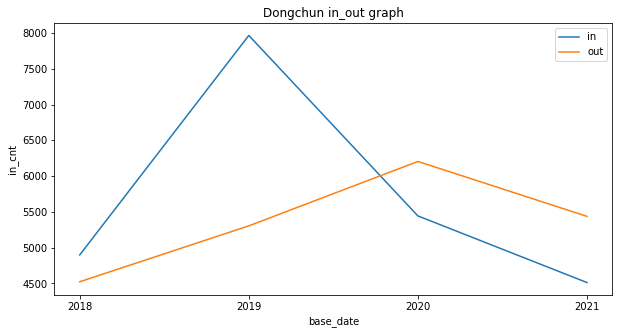

In [ ]:
# 동춘동 전입/전출

plt.figure(figsize = (10,5))
plt.plot(Move_dongchun['base_date'], Move_dongchun['in_cnt'])
plt.plot(Move_dongchun['base_date'], Move_dongchun['out_cnt'])

plt.xlabel('base_date')
plt.ylabel('in_cnt')

plt.xticks(Move_dongchun['base_date'])

plt.title("Dongchun in_out graph")
plt.legend(['in', 'out'])

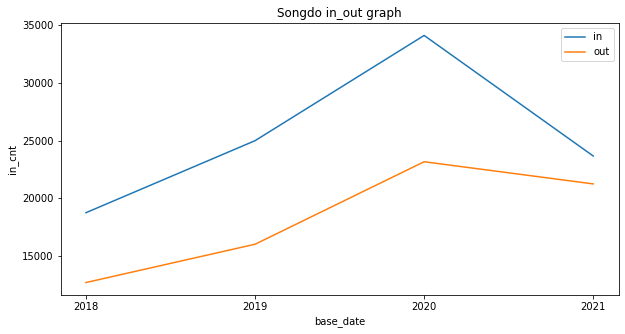

In [ ]:
# 송도동 전입/전출

plt.figure(figsize = (10,5))
plt.plot(Move_songdo['base_date'], Move_songdo['in_cnt'])
plt.plot(Move_songdo['base_date'], Move_songdo['out_cnt'])

plt.xlabel('base_date')
plt.ylabel('in_cnt')

plt.xticks(Move_songdo['base_date'])
plt.title("Songdo in_out graph")
plt.legend(['in', 'out'])

# 데이터 신청

In [ ]:
from geoband.API import *
RequestCompasData('최종_전입전출_신도심_원도심.csv')
RequestCompasData('최종_전입전출_1821.csv')

[2022-09-22 12:08:17] 성공 - 정상적으로 신청되었습니다. 마이페이지내 데이터요청 항목에서 진행사항을 확인해주세요.
[2022-09-22 12:08:17] 성공 - 정상적으로 신청되었습니다. 마이페이지내 데이터요청 항목에서 진행사항을 확인해주세요.
